In [1]:
import cv2
import helpers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mpimage as mpimg

%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.mpimage'

## Training and testing data

In [3]:
img_dir_training = "day_night_images/training/"
img_dir_test = "day_night_images/test/"
img_list = helpers.load_dataset(img_dir_training)

In [4]:
standardized_list = helpers.standardize(img_list)

Shape (600, 1100, 3)
Label 0


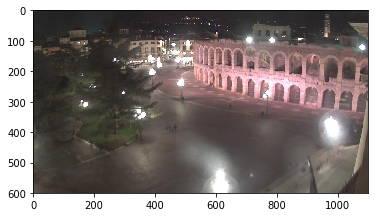

In [5]:
from random import randint

img_num = randint(1, 400)

select_img = standardized_list[img_num][0]
select_label = standardized_list[img_num][1]

plt.imshow(select_img)
print("Shape {}\nLabel {}" .format(select_img.shape, select_label) )

## Feature extraction
### RGB to HSV conversion
Explore the hsv colorspace for finding an average brightness

Label 1


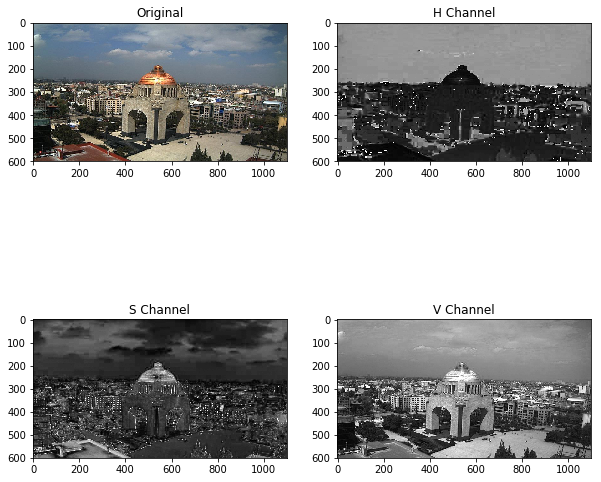

In [23]:
img_num = randint(1, 200)
test_img = standardized_list[img_num][0]
test_label = standardized_list[img_num][1]

hsv = cv2.cvtColor(test_img, cv2.COLOR_RGB2HSV)

print("Label {}" .format(test_label))

h, s, v = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.set_title("Original")
ax1.imshow(test_img)
ax2.set_title("H Channel")
ax2.imshow(h, cmap="gray")

ax3.set_title("S Channel")
ax3.imshow(s, cmap="gray")
ax4.set_title("V Channel")
ax4.imshow(v, cmap="gray")

## Find the avg brightness using V channel
Take in an RGB img and returns a feature value (single one) representing the average level of brightness in the image

In [63]:
def avg_brightness(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    w, h, c = rgb_image.shape
    sum_brightness = np.sum(hsv[:, :, 2])
    area = w*h
    avg = sum_brightness/area
    return avg



In [65]:
nights_avg = []
days_avg = []

for idx, image in enumerate(standardized_list):
    if image[1] == 0:
        nights_avg.append(avg_brightness(image[0]))
    elif image[1] == 1:
        days_avg.append(avg_brightness(image[0]))

day_mean = np.mean(days_avg)
night_mean = np.mean(nights_avg)
day_min = np.amin(days_avg)
night_max = np.amax(nights_avg)

print("AVG sum of days: {}\nMIN of days: {}\nAVG sum of nights: {}\nMAX of nights: {}" 
      .format(day_mean, day_min, night_mean, night_max))

AVG sum of days: 137.37790688131312
MIN of days: 94.57182878787879
AVG sum of nights: 69.20089227272729
MAX of nights: 119.6223


## Classification and visualizing error

In [90]:
def estimate_label(rgb_image):
    avg = avg_brightness(rgb_image)
    # Use the avg to predict the label based on threshold
    threshold = night_mean + (day_mean - night_mean)/2
    
    return 1 if (avg > threshold) else 0

In [91]:
for i in range(10):
    if estimate_label(standardized_list[i][0]) == standardized_list[i][1]:
        print("correct")
    else:
        print("wrong")

correct
correct
correct
correct
correct
correct
correct
correct
correct
correct


## Testing the classifier

### Test dataset
load in the test dataset, standardize it using the function made

In [92]:
import random

test_img_list = helpers.load_dataset(img_dir_test)

standardized_test = helpers.standardize(test_img_list)

random.shuffle(standardized_test)

## Determine the accuracy
Compare the output of classification with the true labels and determine the accuracy

In [93]:
def get_misclassified_img(test_img):
    misclassified_img_labels = []
    
    for image in test_img:
        img = image[0]
        true_label = image[1]
        
        predicted_label = estimate_label(img)
        
        if(predicted_label != true_label):
            misclassified_img_labels.append((img, predicted_label, true_label))
            
    return misclassified_img_labels

In [96]:
# Find all misclassified images in test set

misclassified = get_misclassified_img(standardized_test)

total = len(standardized_test)
num_correct = total - len(misclassified)

accuracy = num_correct/total

print("Accuracy {}\nNumber of misclassified images: {}" .format(accuracy, total))

Accuracy 0.925
Number of misclassified images: 160
